In [1]:
%matplotlib inline

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\programdata\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
C:\Users\kruti\Desktop\ADS Class\Assignment 4\Assignment_4\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['lyrics'] = df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                412416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_______________________________________________________________

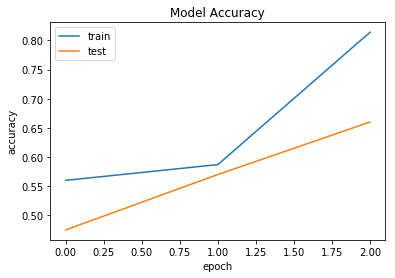

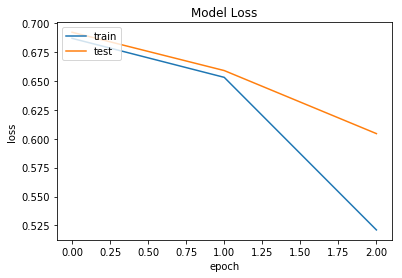

In [2]:
from tensorflow import keras
#from sklearn.metrics import accuracy_score
from build_and_train_model import *
from load_vectorize_data import *


### Logistic Regression metric:

In [3]:
print("Training Accuracy:", score_regression)

Training Accuracy: 0.69


In [4]:
print("CONFUSION MATRIX :")
print(' ')
print("For Train Data:")
y_train_pred_bow = model_bow.predict_classes(X_train)
print(confusion_matrix(Y_train, y_train_pred_bow))
print(' ')
print("For Test Data:")
y_test_pred_bow = model_bow.predict_classes(X_test)
print(confusion_matrix(Y_test, y_pred_regression))

CONFUSION MATRIX :
 
For Train Data:
[[421  25]
 [  5 549]]
 
For Test Data:
[[53 52]
 [10 85]]


In [5]:
print(classification_report(Y_test, y_pred_regression))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63       105
           1       0.62      0.89      0.73        95

   micro avg       0.69      0.69      0.69       200
   macro avg       0.73      0.70      0.68       200
weighted avg       0.74      0.69      0.68       200



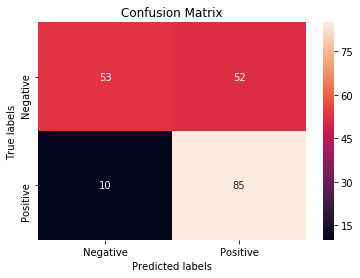

In [6]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_pred_regression), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

### Keras model metric

In [7]:
score = model_bow.evaluate(X_test, Y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])

Test Loss:  0.604431939125061
Test Accuracy 0.66


In [8]:
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX :")
print(' ')
print("For Train Data:")
y_train_pred_bow = model_bow.predict_classes(X_train)
print(confusion_matrix(Y_train, y_train_pred_bow))
print(' ')
print("For Test Data:")
y_test_pred_bow = model_bow.predict_classes(X_test)
print(confusion_matrix(Y_test, y_test_pred_bow))

CONFUSION MATRIX :
 
For Train Data:
[[421  25]
 [  5 549]]
 
For Test Data:
[[46 59]
 [ 9 86]]


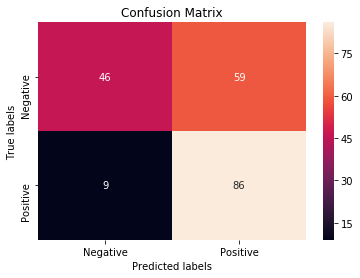

In [9]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_test_pred_bow), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

In [10]:
print(classification_report(Y_test, y_test_pred_bow))

              precision    recall  f1-score   support

           0       0.84      0.44      0.58       105
           1       0.59      0.91      0.72        95

   micro avg       0.66      0.66      0.66       200
   macro avg       0.71      0.67      0.65       200
weighted avg       0.72      0.66      0.64       200



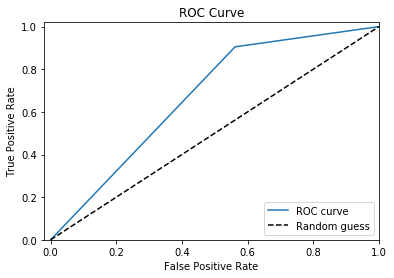

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred_bow)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_test_pred_bow)

0.6716791979949875

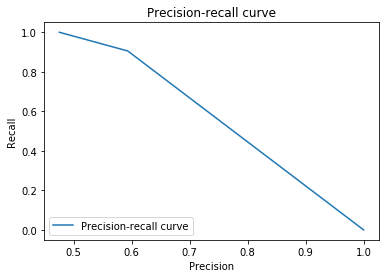

In [13]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(Y_test, y_test_pred_bow)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [14]:
from sklearn.metrics import average_precision_score

average_precision_score(Y_test, y_test_pred_bow)

0.5819147005444645